In [2]:
import sys
sys.path.append('../Codes/library/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
import pandas as pd
from Immuno_models import*

Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


In [290]:
data_AB = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['Antibody name', 'Wu01', 'B1.1.7', 'B1.351', 'B1.429', 'B1.617', 'B1.617.2'])
data_S = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['Wu01S', 'B1.1.7S', 'B1.351S', 'B1.429S', 'B1.617S', 'B1.617.2S'], nrows=10)
donors = pd.read_excel(Text_files_path+'Data/2021-12-29_CoV2NAbs_KV.xlsx', usecols=['ID of donor'], nrows=10)
I = np.size(donors['ID of donor'])
J = np.size(data['Antibody name'])
for i in np.arange(I):
    for j in np.arange(J):
        if(data_AB['Antibody name'][j].split('-')[0]==donors['ID of donor'][i]):
            data_AB['Antibody name']=data_AB['Antibody name'].replace([data_AB['Antibody name'][j]], donors['ID of donor'][i])
data_AB = data_AB.sort_values(['Antibody name', 'Wu01'])


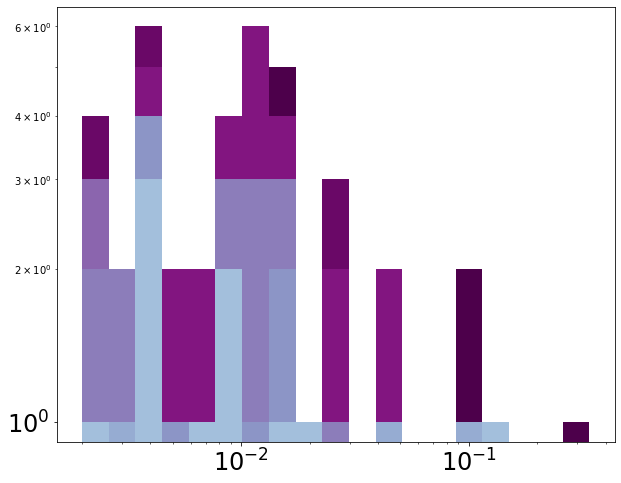

In [256]:
fig, ax = plt.subplots(figsize = (10,8))
colors_donors  = plt.cm.BuPu(np.linspace(0,1,I+5))
data_I = []
for i in np.arange(I):
    data_I.append(data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], 'Wu01'].to_list())
ax.hist(data_I, bins=np.logspace(np.log10(np.min(data_i)), np.log10(np.max(data_i)), 20), histtype = 'barstacked', color = colors_donors[5:])
my_plot_layout(ax=ax, xscale='log', yscale='log')


/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/robertomorantovar/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


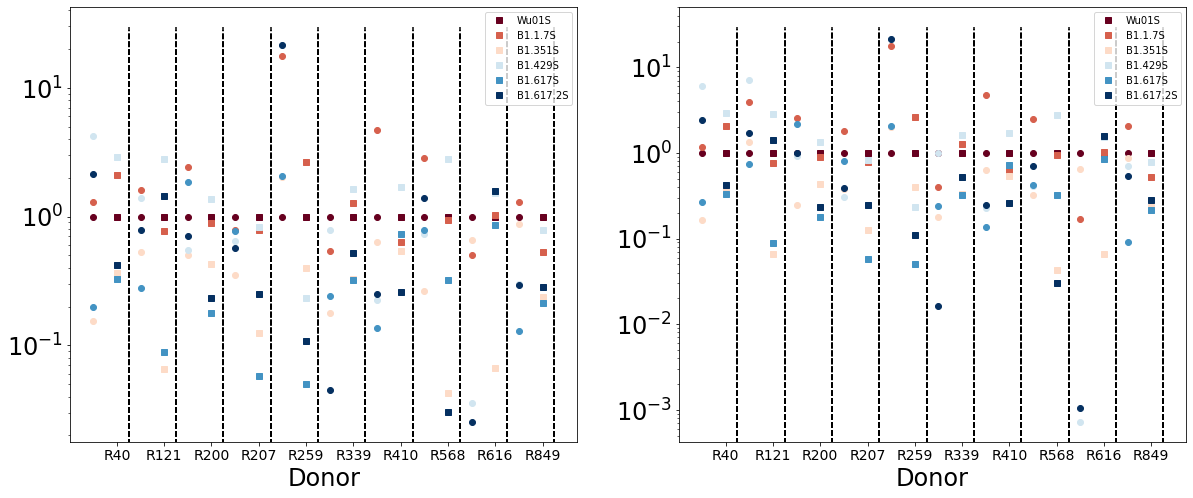

In [364]:
colors_variants  = plt.cm.RdBu(np.linspace(0,1,6))
fig, ax = plt.subplots(1, 2, figsize = (20,8))

for v, variant in enumerate(data_AB.columns[1:]):
    for i in range(I):
        temp_array=data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], variant]
        temp_array2=data_AB.loc[data_AB['Antibody name']==donors['ID of donor'][i], 'Wu01']
        ax[0].scatter(2*i, np.exp(np.average(np.log(temp_array2[temp_array!='>10'].to_list())))/np.exp(np.average(np.log(temp_array[temp_array!='>10'].to_list()))), color=colors_variants[v])
        weights = np.array([n**(-1/3) for n in range(1, len(temp_array2)+1)])
        weights=-np.log10(temp_array2)-np.min(-np.log10(temp_array2))+1
        weights=(1/temp_array2)**(1/2)
        weights=weights[temp_array!='>10']
        if weights.size != 0:
            ax[1].scatter(2*i, np.exp(np.average(np.log(temp_array2[temp_array!='>10'].to_list()), weights=weights))/np.exp(np.average(np.log(temp_array[temp_array!='>10'].to_list()), weights=weights)), color=colors_variants[v])

for v, variant in enumerate(data_S.columns[0:]):
    ax[0].plot(np.arange(1,2*I,2), data_S[variant]/data_S['Wu01S'], label = variant, marker = 's', linestyle='', color = colors_variants[v])
    ax[0].vlines(np.arange(1,2*I,2)+0.5, ax[0].get_ylim()[0], ax[0].get_ylim()[1], linestyle='--', color = 'black')
    ax[1].plot(np.arange(1,2*I,2), data_S[variant]/data_S['Wu01S'], label = variant, marker = 's', linestyle='', color = colors_variants[v])
    ax[1].vlines(np.arange(1,2*I,2)+0.5, ax[1].get_ylim()[0], ax[1].get_ylim()[1], linestyle='--', color = 'black')


ax[0].legend()
my_plot_layout(ax=ax[0], yscale='log', xlabel = 'Donor')
ax[0].set_xticks(np.arange(1,2*I,2))
ax[0].set_xticklabels(donors['ID of donor'], fontsize = 14);

ax[1].legend()
my_plot_layout(ax=ax[1], yscale='log', xlabel = 'Donor')
ax[1].set_xticks(np.arange(1,2*I,2))
ax[1].set_xticklabels(donors['ID of donor'], fontsize = 14);
